# ***Import Libraries***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

pd.options.display.max_rows = 0
pd.options.display.max_columns = 0

# ***Data reading***

In [ ]:
Data = pd.read_feather('/content/drive/MyDrive/Loan/Modelos_2015.feather')

In [ ]:
Data.shape

(2233083, 30)

In [ ]:
Data.columns

Index(['Unnamed: 0', 'int_rate', 'last_fico', 'loan_amnt', 'dti',
       'installment', 'max_bal_bc', 'mo_sin_old_rev_tl_op', 'mort_acc',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'revol_util', 'tot_cur_bal',
       'tot_hi_cred_lim', 'total_acc', 'annual_inc', 'bc_open_to_buy',
       'delinq_amnt', 'inq_last_6mths', 'addr_state', 'application_type',
       'emp_length', 'emp_title', 'grade', 'home_ownership',
       'initial_list_status', 'purpose', 'term', 'verification_status',
       'loan_status'],
      dtype='object')

In [ ]:
Data = Data.drop(columns=['Unnamed: 0'])

In [ ]:
Data["issue_d"] = pd.to_datetime(Data["issue_d"])
Data = Data.loc[(Data['issue_d'] >= '2015-08-01')]

In [ ]:
Data.head()

,int_rate,last_fico,loan_amnt,dti,installment,max_bal_bc,mo_sin_old_rev_tl_op,mort_acc,pct_tl_nvr_dlq,percent_bc_gt_75,revol_util,tot_cur_bal,tot_hi_cred_lim,total_acc,annual_inc,bc_open_to_buy,delinq_amnt,inq_last_6mths,addr_state,application_type,emp_length,emp_title,grade,home_ownership,initial_list_status,purpose,term,verification_status,loan_status
0,7.97,692.0,12000.0,27.74,375.88,7117.0,255.0,0.0,100.0,0.0,37.0,30502.0,57180.0,16.0,42000.0,7144.0,0.0,0.0,CA,Individual,10+ years,associate,A,OWN,w,debt_consolidation,36 months,Source Verified,Fully Paid
1,11.99,672.0,32000.0,12.35,1062.71,14049.0,144.0,3.0,94.9,0.0,34.1,405751.0,527034.0,42.0,155000.0,81313.0,0.0,1.0,NJ,Individual,10+ years,Nurse,B,MORTGAGE,w,credit_card,36 months,Source Verified,Current
2,15.05,767.0,40000.0,31.11,952.65,10609.0,185.0,4.0,100.0,0.0,20.7,227506.0,367745.0,26.0,120000.0,51211.0,0.0,0.0,TX,Individual,9 years,Driver,C,MORTGAGE,w,debt_consolidation,60 months,Verified,Current
3,7.97,672.0,16000.0,15.94,501.17,2959.0,207.0,0.0,78.9,100.0,57.7,128572.0,125018.0,20.0,79077.0,336.0,0.0,0.0,VA,Individual,5 years,Senior Investigator,A,RENT,w,debt_consolidation,36 months,Not Verified,Current
4,7.21,707.0,33000.0,19.06,1022.12,9317.0,133.0,2.0,100.0,0.0,16.1,244459.0,404510.0,52.0,107000.0,65368.0,0.0,0.0,TX,Joint App,< 1 year,Registered Nurse,A,MORTGAGE,w,debt_consolidation,36 months,Verified,Late (31-120 days)


# ***Data loss is evidenced***

In [ ]:
Data.isna().sum()

int_rate                0
last_fico               0
loan_amnt               0
dti                     0
installment             0
max_bal_bc              0
mo_sin_old_rev_tl_op    0
mort_acc                0
pct_tl_nvr_dlq          0
percent_bc_gt_75        0
revol_util              0
tot_cur_bal             0
                       ..
annual_inc              0
bc_open_to_buy          0
delinq_amnt             0
inq_last_6mths          0
application_type        0
emp_length              0
grade                   0
home_ownership          0
purpose                 0
term                    0
verification_status     0
loan_status             0
Length: 26, dtype: int64

In [ ]:
Data_Loss = pd.DataFrame(index = Data.isna().sum().keys())
Data_Loss['Value'] = Data.isna().sum()
Data_Loss.reset_index(inplace=True)
Data_Loss.rename(columns = {'index':'Columns'}, inplace = True)
Data_Loss = pd.pivot_table(Data_Loss, values='Value', columns = ['Columns'])

In [ ]:
Data_Loss

Columns,acc_now_delinq,acc_open_past_24mths,addr_state,all_util,annual_inc,annual_inc_joint,application_type,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,debt_settlement_flag,deferral_term,delinq_2yrs,delinq_amnt,dti,dti_joint,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,funded_amnt,funded_amnt_inv,grade,hardship_amount,hardship_dpd,hardship_end_date,hardship_flag,hardship_last_payment_amount,hardship_length,hardship_loan_status,hardship_payoff_balance_amount,hardship_reason,hardship_start_date,hardship_status,hardship_type,home_ownership,...,purpose,pymnt_plan,recoveries,revol_bal,revol_bal_joint,revol_util,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_earliest_cr_line,sec_app_fico_range_high,sec_app_fico_range_low,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_num_rev_accts,sec_app_open_acc,sec_app_open_act_il,sec_app_revol_util,sub_grade,tax_liens,term,title,tot_coll_amt,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bal_il,total_bc_limit,total_cu_tl,total_il_high_credit_limit,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,total_rev_hi_lim,url,verification_status,verification_status_joint,zip_code
Value,0,0,0,174076,0,2022570,0,100,26503,27584,0,0,0,0,2091748,0,0,3108,2022574,0,172326,224583,0,0,0,0,0,2053926,2091749,2091748,37819,2053926,2091748,2091974,2053926,2091754,2091748,2091751,2091748,0,...,0,0,0,0,2035260,2233,2035259,2035259,2035259,2035259,2035259,2035259,2035259,2035259,2035259,2035259,2038496,0,0,0,23305,0,0,0,0,0,173720,0,173721,0,0,0,0,0,0,0,0,0,2038296,1


In [ ]:
Data = Data[['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
             'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
             'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies']]

"Data = Data[['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',\n             'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',\n             'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies']]"

# ***Exploratory data analysis***

In [ ]:
Data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204735 entries, 0 to 1204734
Data columns (total 26 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   int_rate              1204735 non-null  float64
 1   last_fico             1204735 non-null  float64
 2   loan_amnt             1204735 non-null  float64
 3   dti                   1204735 non-null  float64
 4   installment           1204735 non-null  float64
 5   max_bal_bc            1204735 non-null  float64
 6   mo_sin_old_rev_tl_op  1204735 non-null  float64
 7   mort_acc              1204735 non-null  float64
 8   pct_tl_nvr_dlq        1204735 non-null  float64
 9   percent_bc_gt_75      1204735 non-null  float64
 10  revol_util            1204735 non-null  float64
 11  tot_cur_bal           1204735 non-null  float64
 12  tot_hi_cred_lim       1204735 non-null  float64
 13  total_acc             1204735 non-null  float64
 14  annual_inc            1204735 non-

In [ ]:
Data.describe()

,int_rate,last_fico,loan_amnt,dti,installment,max_bal_bc,mo_sin_old_rev_tl_op,mort_acc,pct_tl_nvr_dlq,percent_bc_gt_75,revol_util,tot_cur_bal,tot_hi_cred_lim,total_acc,annual_inc,bc_open_to_buy,delinq_amnt,inq_last_6mths,emp_length,loan_status
count,1.204735e+06,1.204735e+06,1.204735e+06,1.204735e+06,1.204735e+06,1.204735e+06,1.204735e+06,1.204735e+06,1.204735e+06,1.204735e+06,1.204735e+06,1.204735e+06,1.204735e+06,1.204735e+06,1.204735e+06,1.204735e+06,1.204735e+06,1.204735e+06,1.204735e+06,1.204735e+06
mean,1.304036e+01,6.690729e+02,1.465442e+04,1.903489e+01,4.445436e+02,5.541057e+03,1.788263e+02,1.502684e+00,9.395810e+01,3.876080e+01,4.746874e+01,1.443611e+05,1.813932e+05,2.417048e+01,7.935109e+04,1.232094e+04,1.530532e+01,5.516483e-01,5.450193e+00,7.747837e-01
std,5.068330e+00,1.046544e+02,9.336552e+03,1.542081e+01,2.799901e+02,5.266442e+03,9.765422e+01,1.830403e+00,9.212335e+00,3.586129e+01,2.488751e+01,1.635410e+05,1.850617e+05,1.219332e+01,1.404684e+05,1.736749e+04,8.238683e+02,8.388162e-01,3.918366e+00,4.177249e-01
min,5.310000e+00,2.490000e+02,1.000000e+03,-1.000000e+00,7.610000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.430000e+00,6.220000e+02,7.450000e+03,1.189000e+01,2.392100e+02,2.475000e+03,1.140000e+02,0.000000e+00,9.090000e+01,0.000000e+00,2.820000e+01,2.920250e+04,5.183600e+04,1.500000e+01,4.700000e+04,2.064000e+03,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00
50%,1.229000e+01,6.920000e+02,1.200000e+04,1.795000e+01,3.703700e+02,4.950000e+03,1.610000e+02,1.000000e+00,9.840000e+01,3.330000e+01,4.660000e+01,7.996700e+04,1.161220e+05,2.200000e+01,6.550000e+04,6.306000e+03,0.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00
75%,1.599000e+01,7.320000e+02,2.000000e+04,2.478000e+01,5.977800e+02,6.659000e+03,2.290000e+02,2.000000e+00,1.000000e+02,6.670000e+01,6.620000e+01,2.160970e+05,2.622000e+05,3.100000e+01,9.500000e+04,1.533500e+04,0.000000e+00,1.000000e+00,1.000000e+01,1.000000e+00
max,3.099000e+01,8.470000e+02,4.000000e+04,9.990000e+02,1.719830e+03,1.170668e+06,9.090000e+02,6.100000e+01,1.000000e+02,1.000000e+02,1.828000e+02,8.524709e+06,9.999999e+06,1.760000e+02,1.100000e+08,6.059960e+05,2.499250e+05,5.000000e+00,1.000000e+01,1.000000e+00


In [ ]:
Data['loan_status'].value_counts()

Current               1026252
Fully Paid             933437
Charged Off            242302
Late (31-120 days)      15986
In Grace Period          9934
Late (16-30 days)        2695
Issued                   2062
Default                   415
Name: loan_status, dtype: int64

In [ ]:
Data.drop(Data.loc[Data['loan_status']=='Late (31-120 days)'].index, inplace=True)
Data.drop(Data.loc[Data['loan_status']=='In Grace Period'].index, inplace=True)
Data.drop(Data.loc[Data['loan_status']=='Late (16-30 days)'].index, inplace=True)
Data.drop(Data.loc[Data['loan_status']=='Issued'].index, inplace=True)
Data.drop(Data.loc[Data['loan_status']=='Default'].index, inplace=True)

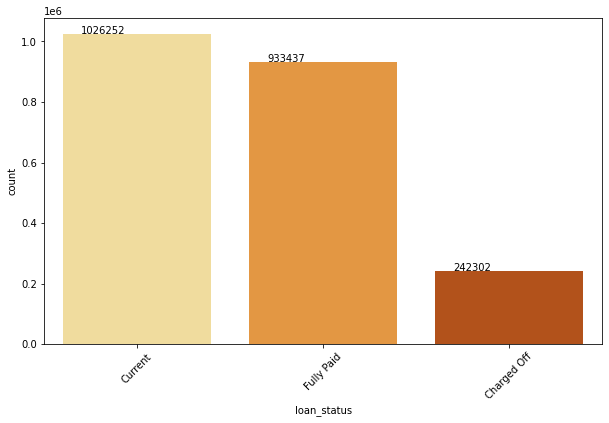

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x = 'loan_status', data = Data, palette='YlOrBr', order=["Current", "Fully Paid", "Charged Off"])

for p in ax.patches: ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

plt.xticks(rotation=45)
plt.show()

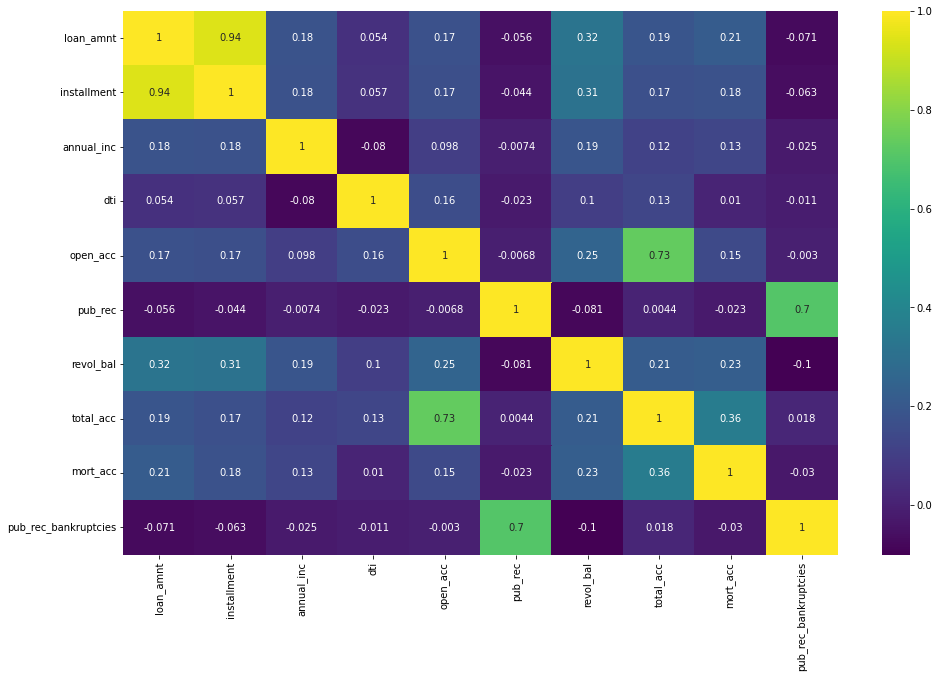

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(Data.corr(), annot=True, cmap='viridis')

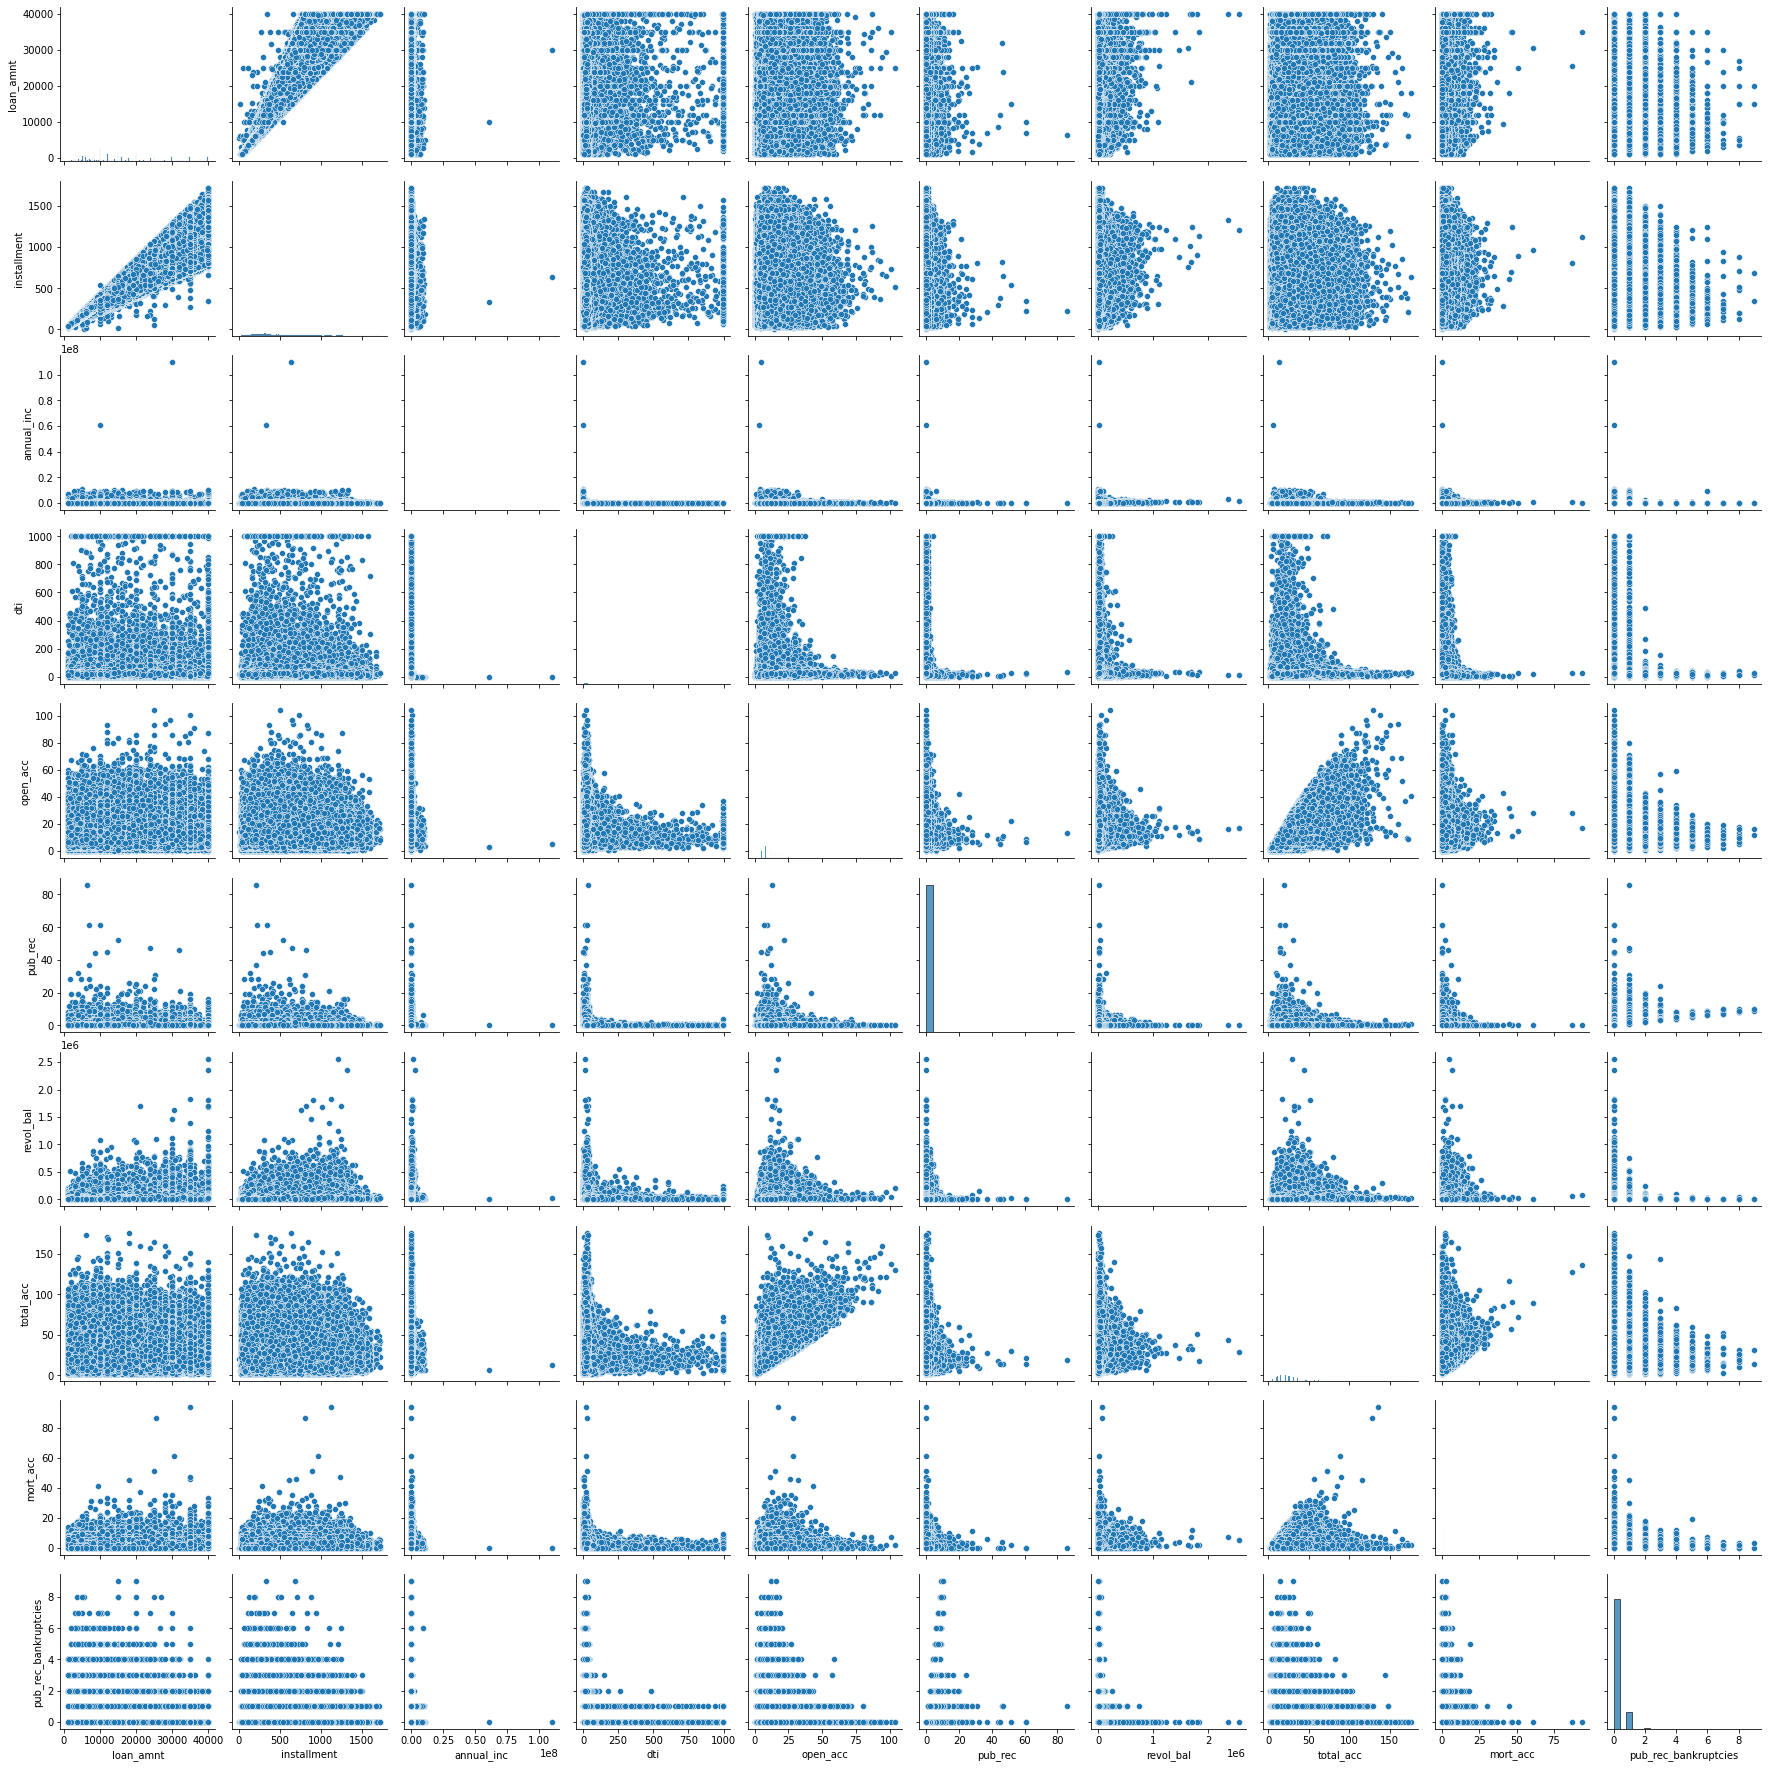

In [ ]:
sns.pairplot(Data)

***installment:*** The monthly payment due from the borrower if the loan is originated.

***loan_amnt:*** The amount of the loan requested by the borrower. If at any time, the credit department reduces the amount of the loan, then it will be reflected in this value.

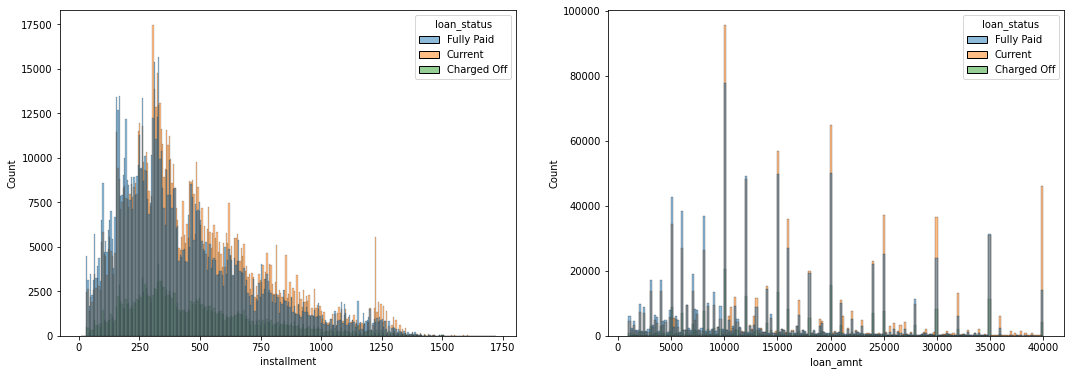

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

#create chart in each subplot
sns.histplot(data=Data, x='installment', hue='loan_status', ax=axes[0])
sns.histplot(data=Data, x='loan_amnt', hue='loan_status', ax=axes[1])

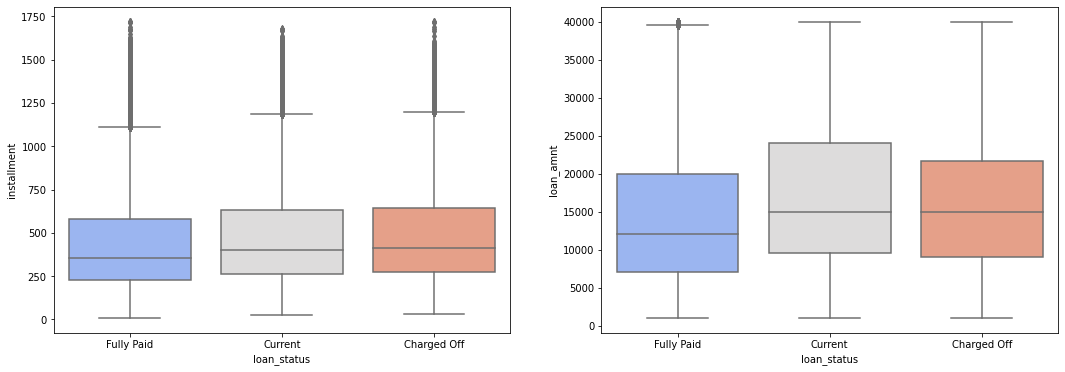

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

#create chart in each subplot
sns.boxplot(data=Data, x='loan_status', y='installment', palette='coolwarm', ax=axes[0])
sns.boxplot(data=Data, x='loan_status', y='loan_amnt', palette='coolwarm', ax=axes[1])

In [ ]:
Data.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,242302.0,16103.402469,9409.484517,1000.0,9000.0,15000.0,21600.0,40000.0
Current,1026252.0,16690.447375,10180.570759,1000.0,9600.0,15000.0,24000.0,40000.0
Fully Paid,933437.0,14194.432217,9243.084121,1000.0,7000.0,12000.0,20000.0,40000.0


**grade:** LC assigned loan grade


**sub_grade:** LC assigned loan subgrade

In [ ]:
print("GRADE unique: ", Data.grade.unique())
print("SUB_GRADE unique: ", Data.sub_grade.unique())

GRADE unique:  ['A' 'B' 'C' 'E' 'D' 'F' 'G']
SUB_GRADE unique:  ['A5' 'B5' 'C4' 'B1' 'C5' 'C2' 'C3' 'E2' 'D1' 'F1' 'G2' 'E4' 'E3' 'D3'
 'D5' 'C1' 'A2' 'B4' 'D4' 'A1' 'D2' 'B2' 'A4' 'F4' 'A3' 'B3' 'G3' 'F2'
 'F3' 'E5' 'F5' 'G4' 'G5' 'E1' 'G1']


In [ ]:
fully_paid = Data.loc[Data['loan_status']=='Fully Paid']
charged_off = Data.loc[Data['loan_status']=='Charged Off']
current = Data.loc[Data['loan_status']=='Current']

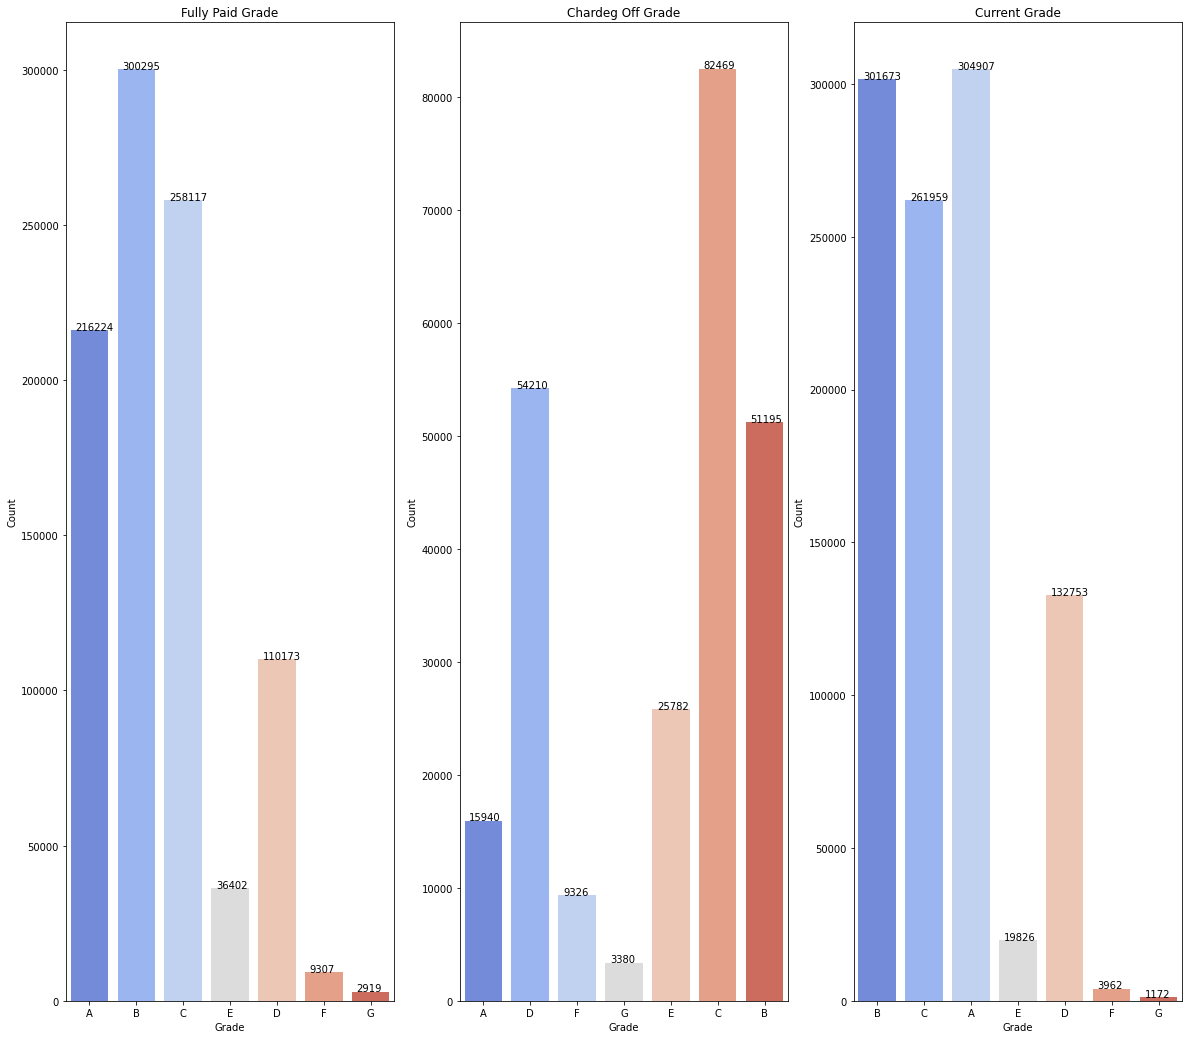

In [ ]:
plt.figure(figsize=(20, 18))

plt.subplot(1, 3, 1)
ax = sns.countplot(x='grade', data=fully_paid, palette='coolwarm')

for p in ax.patches: ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

plt.title('Fully Paid Grade')
plt.xlabel('Grade')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
ax1 = sns.countplot(x='grade', data=charged_off, palette='coolwarm')

for p in ax1.patches: ax1.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

plt.title('Chardeg Off Grade')
plt.xlabel('Grade')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
ax1 = sns.countplot(x='grade', data=current, palette='coolwarm')

for p in ax1.patches: ax1.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

plt.title('Current Grade')
plt.xlabel('Grade')
plt.ylabel('Count')

plt.show()

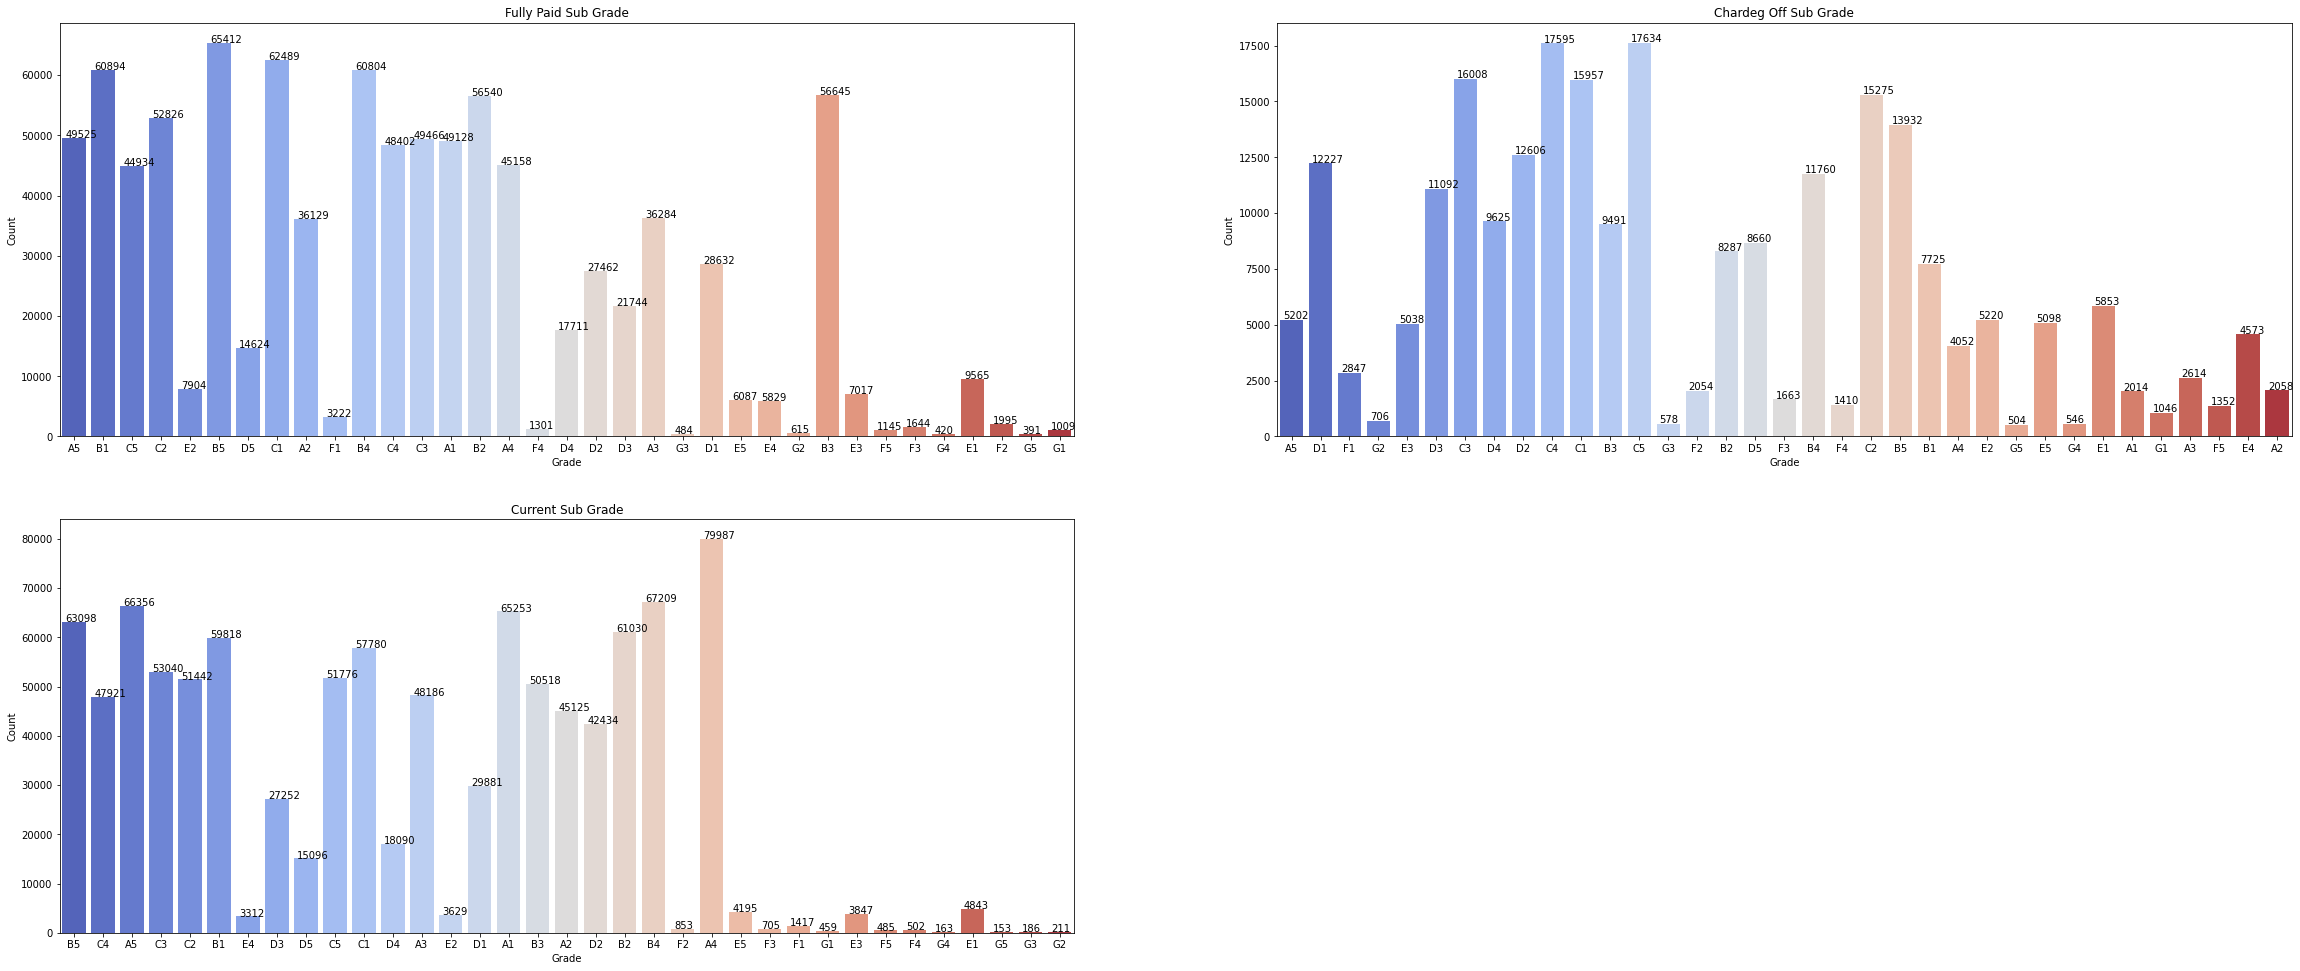

In [ ]:
plt.figure(figsize=(40, 35))

plt.subplot(4, 2, 1)
ax = sns.countplot(x='sub_grade', data=fully_paid, palette='coolwarm')
for p in ax.patches: ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.title('Fully Paid Sub Grade')
plt.xlabel('Grade')
plt.ylabel('Count')

plt.subplot(4, 2, 2)
ax1 = sns.countplot(x='sub_grade', data=charged_off, palette='coolwarm')
for p in ax1.patches: ax1.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.title('Chardeg Off Sub Grade')
plt.xlabel('Grade')
plt.ylabel('Count')

plt.subplot(4, 2, 3)
ax1 = sns.countplot(x='sub_grade', data=current, palette='coolwarm')
for p in ax1.patches: ax1.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.title('Current Sub Grade')
plt.xlabel('Grade')
plt.ylabel('Count')

plt.show()

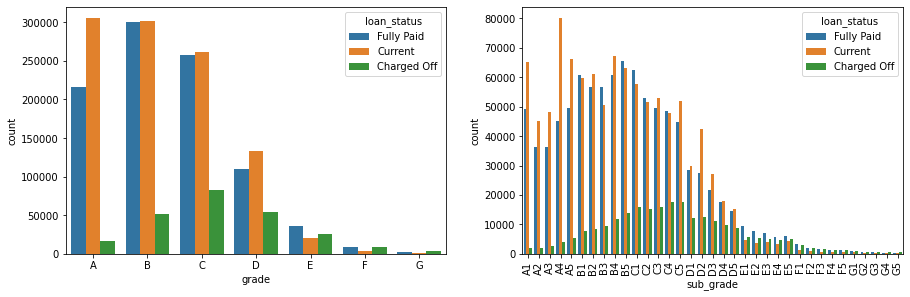

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(Data.grade.unique().tolist())
sns.countplot(x='grade', data=Data, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(Data.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=Data, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

***home_ownership:*** Homeownership status provided by the borrower during registration or obtained from the credit report.


In [ ]:
Data['home_ownership'].value_counts()

MORTGAGE    1077272
RENT         859562
OWN          261714
ANY            3438
NONE              5
Name: home_ownership, dtype: int64

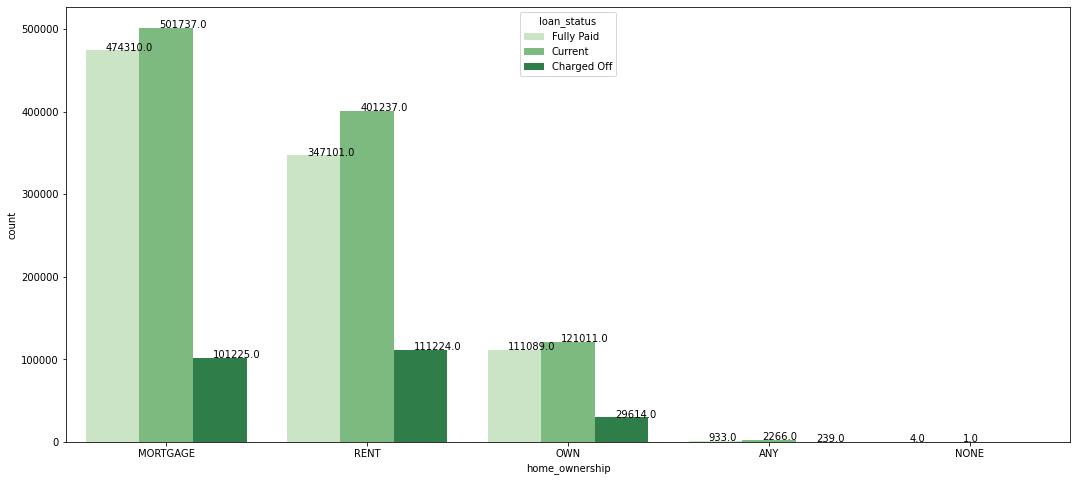

In [ ]:
fig, axes = plt.subplots(figsize=(18, 8))

ax = sns.countplot(x = 'home_ownership', hue="loan_status", data = Data, palette='Greens', order=["MORTGAGE", "RENT", "OWN", "ANY", "NONE"])
for p in ax.patches: ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.show()

In [ ]:
Data.loc[(Data.home_ownership == 'ANY') | (Data.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'  
Data.home_ownership.value_counts()

MORTGAGE    1077272
RENT         859562
OWN          261714
OTHER          3443
Name: home_ownership, dtype: int64

***term:*** The number of loan payments. The values are in months and can be 36 or 60.

***verification_status:*** Indicates whether the income was verified by LC, not verified, or whether the source of income was verified.

***purpose:*** A category provided by the borrower for the loan application.

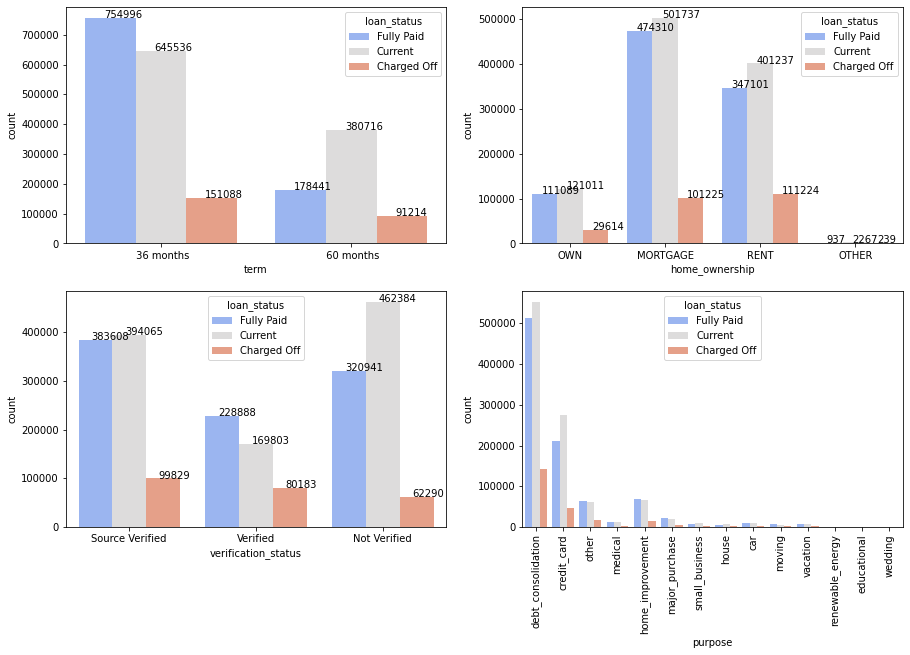

In [ ]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
ax = sns.countplot(x='term', data=Data, hue='loan_status', palette='coolwarm')
for p in ax.patches: ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

plt.subplot(4, 2, 2)
ax1 = sns.countplot(x='home_ownership', data=Data, hue='loan_status', palette='coolwarm')
for p in ax1.patches: ax1.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

plt.subplot(4, 2, 3)
ax2 = sns.countplot(x='verification_status', data=Data, hue='loan_status', palette='coolwarm')
for p in ax2.patches: ax2.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=Data, hue='loan_status', palette='coolwarm')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [ ]:
Data.loc[Data['home_ownership']=='OTHER', 'loan_status'].value_counts()

Current        2267
Fully Paid      937
Charged Off     239
Name: loan_status, dtype: int64

***int_rate:*** Loan interest rate.

***annual_inc:*** The annual rent self-declared by the borrower during registration.

In [ ]:
Data['annual_inc'].mean()

81732.48025616739

In [ ]:
def ToRange(annual_inc):
  if annual_inc < 82000:
    return '< 82000'
  else:
    return '> 82000'

In [ ]:
Data['annual_inc_Range'] = Data['annual_inc'].apply(lambda x: ToRange(x))

In [ ]:
float(Data['int_rate'].max().strip().replace('%',''))

30.99

In [ ]:
def ToRange(int_rate):
  if int_rate < 15:
    return '< 15'
  else:
    return '> 15'

In [ ]:
Data['int_rate_Range'] = Data['int_rate'].apply(lambda x: ToRange(float(x.strip().replace('%',''))))

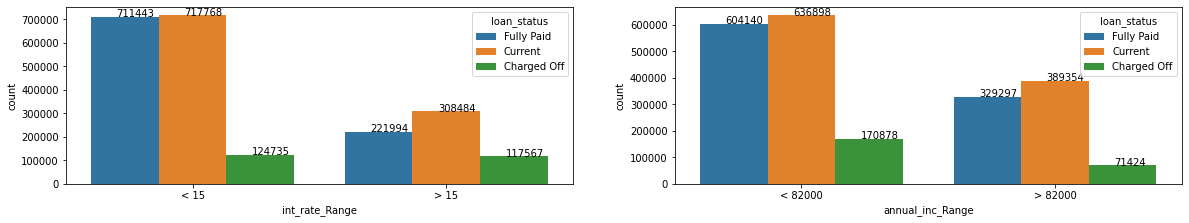

In [ ]:
plt.figure(figsize=(20, 15))

plt.subplot(4, 2, 1)
ax = sns.countplot(x='int_rate_Range', data=Data, hue='loan_status')
for p in ax.patches: ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

plt.subplot(4, 2, 2)
ax1 = sns.countplot(x='annual_inc_Range', data=Data, hue='loan_status')
for p in ax1.patches: ax1.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [ ]:
Data.loc[Data.annual_inc >= 1000000, 'loan_status'].value_counts()

Current        562
Fully Paid     355
Charged Off     65
Name: loan_status, dtype: int64

In [ ]:
Data.loc[Data.annual_inc >= 250000, 'loan_status'].value_counts()

Current        20691
Fully Paid     15283
Charged Off     2480
Name: loan_status, dtype: int64

***emp_title:*** The job title supplied by the Borrower when applying for the loan.

***emp_length:*** The duration of employment in years. Possible values are between 0 and 10, where 0 means less than one year and 10 means ten or more years.

In [ ]:
print(Data.emp_title.isna().sum())

print(Data.emp_title.nunique())

219816
390859


In [ ]:
Data['emp_title'].value_counts()[:10]

Teacher             39912
Manager             35264
Owner               20816
Driver              16914
Registered Nurse    16587
RN                  14356
Supervisor          14183
Sales               12851
Project Manager     11102
Office Manager      10154
Name: emp_title, dtype: int64

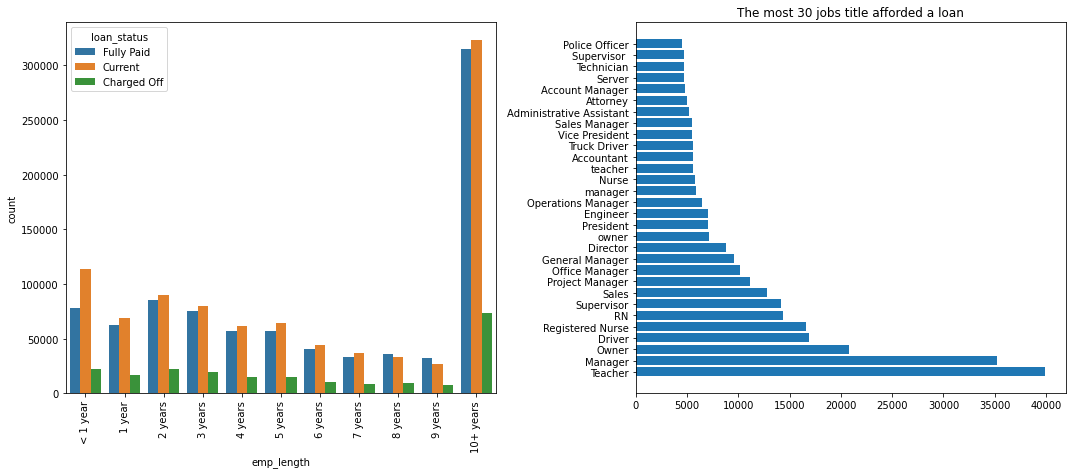

In [ ]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years',]
g = sns.countplot(x='emp_length', data=Data, hue='loan_status', order=order)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

plt.subplot(2, 2, 2)
plt.barh(Data.emp_title.value_counts()[:30].index, Data.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title afforded a loan")
plt.tight_layout()

***issue_d:*** The month in which the loan was financed.

***earliest_cr_line:*** The month in which the borrower's first line of credit was opened.

In [ ]:
Data['earliest_cr_line'].value_counts()

Aug-2006    16997
Sep-2005    16912
Aug-2005    16616
Sep-2004    16105
Aug-2004    15103
Sep-2003    14689
Aug-2003    14557
Sep-2006    14321
Aug-2007    14306
Oct-2004    14152
Oct-2005    13954
Oct-2003    13510
            ...  
Nov-1952        1
Feb-1957        1
Apr-1959        1
Aug-1953        1
Nov-1958        1
Jun-1955        1
Mar-1958        1
May-1955        1
Aug-1950        1
Aug-1951        1
Jun-1949        1
Aug-1957        1
Name: earliest_cr_line, Length: 761, dtype: int64

In [ ]:
Data['earliest_cr_line'] = pd.to_datetime(Data['earliest_cr_line'])

In [ ]:
def ToRange(year):
  if year < 2000:
    return '>2000'
  else:
    return '<2000'

In [ ]:
Data['Earliest_Range'] = Data['earliest_cr_line'].apply(lambda x: ToRange(x.year))

In [ ]:
fully_paid = Data.loc[Data['loan_status']=='Fully Paid']
charged_off = Data.loc[Data['loan_status']=='Charged Off']
current = Data.loc[Data['loan_status']=='Current']

Text(0.5, 1.0, 'Current Earliest_Range')

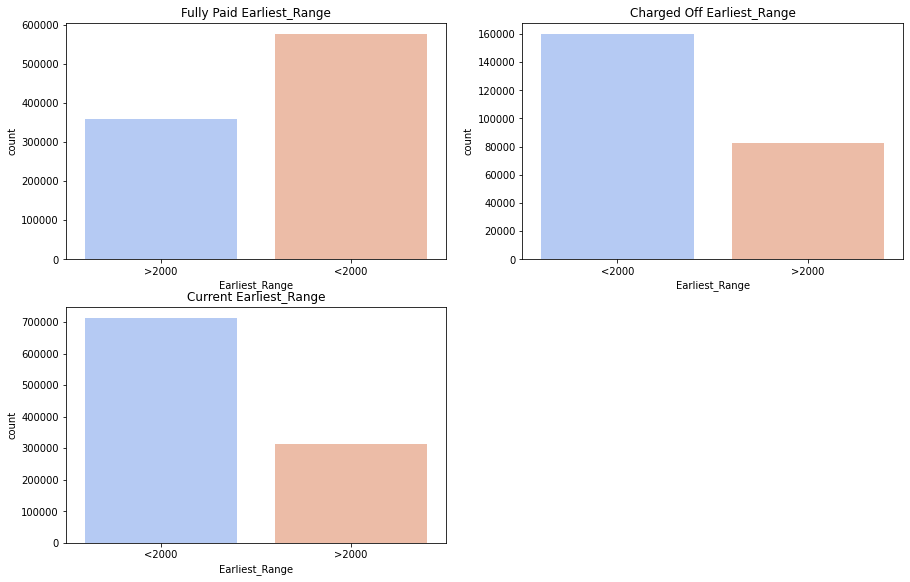

In [ ]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
ax = sns.countplot(x='Earliest_Range', data=fully_paid, palette='coolwarm')
plt.title('Fully Paid Earliest_Range')

plt.subplot(4, 2, 2)
ax = sns.countplot(x='Earliest_Range', data=charged_off, palette='coolwarm')
plt.title('Charged Off Earliest_Range')

plt.subplot(4, 2, 3)
ax = sns.countplot(x='Earliest_Range', data=current, palette='coolwarm')
plt.title('Current Earliest_Range')

***title:*** The loan title provided by the borrower.

In [ ]:
Data.title.isna().sum()

23210

In [ ]:
Data['title'] = Data.title.str.lower()

In [ ]:
Data.title.value_counts()[:10]

debt consolidation         1193571
credit card refinancing     526419
home improvement            150216
other                       141418
major purchase               48107
medical expenses             28194
car financing                22167
business                     20608
home buying                  16147
vacation                     16117
Name: title, dtype: int64

***title*** will be removed because we have the purpose column with is generated from it.

***dti:*** Ratio calculated from the borrower's total monthly debt payments on total liabilities, excluding mortgage and requested LC loan, divided by the borrower's self-reported monthly income.

***open_acc:*** The number of open lines of credit in the borrower's credit file.

***revol_bal:*** The total revolving credit balance.

***revol_util:*** Revolving line utilization rate, or the amount of credit the borrower is using in relation to all available revolving credit.

***total_acc:*** The total number of credit lines currently in the borrower's credit file.

In [ ]:
Data.dti.value_counts()

0.00      1896
16.80     1494
18.00     1484
19.20     1422
14.40     1389
15.60     1388
13.20     1374
12.00     1357
21.60     1312
20.40     1303
10.80     1219
17.28     1203
          ... 
292.25       1
101.45       1
127.32       1
106.35       1
342.24       1
72.83        1
358.76       1
68.66        1
139.88       1
503.61       1
189.30       1
100.23       1
Name: dti, Length: 13118, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Dti Distribution <= 50')

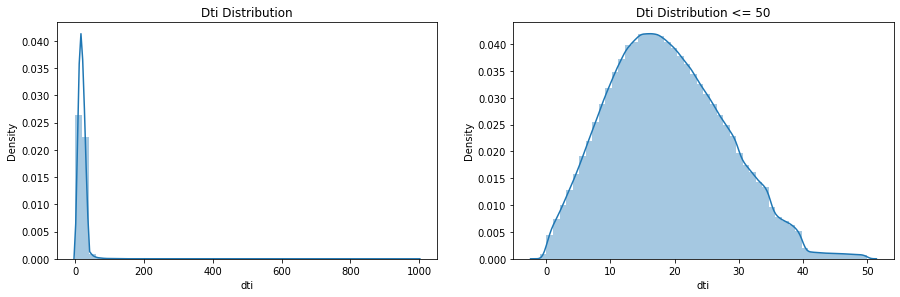

In [ ]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
ax = sns.distplot(Data['dti'])
plt.title('Dti Distribution')

plt.subplot(4, 2, 2)
ax = sns.distplot(Data['dti'][Data['dti'] <= 50])
plt.title('Dti Distribution <= 50')

In [ ]:
Data.loc[Data['dti']<=50, 'loan_status'].value_counts()

Current        1006789
Fully Paid      926955
Charged Off     239755
Name: loan_status, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

Text(0.5, 1.0, 'Distribution <= 50')

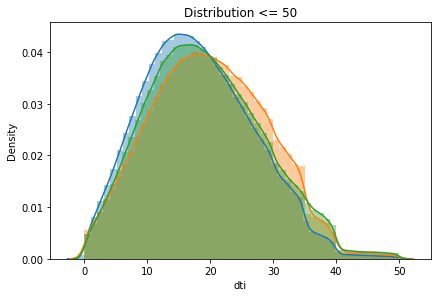

In [ ]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
ax = sns.distplot(fully_paid['dti'][fully_paid['dti'] <= 50])
plt.title('Dti Distribution <= 50')

plt.subplot(4, 2, 1)
ax = sns.distplot(charged_off['dti'][charged_off['dti'] <= 50])
plt.title('Dti Distribution <= 50')

plt.subplot(4, 2, 1)
ax = sns.distplot(current['dti'][current['dti'] <= 50])
plt.title('Distribution <= 50')

In [ ]:
Data.open_acc.value_counts()

9.0      184068
8.0      178819
10.0     178025
7.0      165757
11.0     165435
12.0     149268
6.0      140860
13.0     130923
14.0     114117
5.0      107526
15.0      97145
16.0      81942
          ...  
76.0          2
94.0          1
78.0          1
84.0          1
75.0          1
101.0         1
104.0         1
85.0          1
77.0          1
91.0          1
97.0          1
88.0          1
Name: open_acc, Length: 92, dtype: int64

In [ ]:
Data.loc[Data['open_acc']<=50, 'loan_status'].value_counts()

Current        1025968
Fully Paid      933224
Charged Off     242231
Name: loan_status, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

Text(0.5, 1.0, 'open_acc Distribution <= 50')

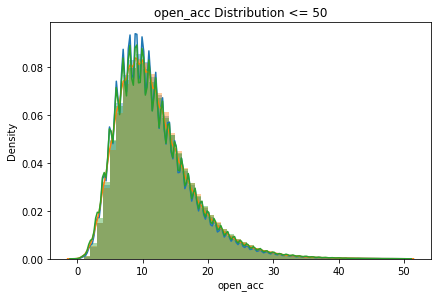

In [ ]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
ax = sns.distplot(fully_paid['open_acc'][fully_paid['open_acc'] <= 50])
plt.title('open_acc Dti Distribution <= 50')

plt.subplot(4, 2, 1)
ax = sns.distplot(charged_off['open_acc'][charged_off['open_acc'] <= 50])
plt.title('open_acc Distribution <= 50')

plt.subplot(4, 2, 1)
ax = sns.distplot(current['open_acc'][current['open_acc'] <= 50])
plt.title('open_acc Distribution <= 50')

In [ ]:
Data.revol_bal.value_counts()

0.0         14969
8.0           295
10.0          191
2.0           186
5.0           171
4.0           169
6.0           162
6118.0        157
39.0          157
6312.0        157
3.0           154
3000.0        151
            ...  
159959.0        1
337353.0        1
192280.0        1
61182.0         1
126189.0        1
126995.0        1
200293.0        1
66775.0         1
114845.0        1
122599.0        1
104573.0        1
60012.0         1
Name: revol_bal, Length: 105896, dtype: int64

In [ ]:
Data.loc[Data['revol_bal']<=5, 'revol_bal'].value_counts()

0.0    14969
2.0      186
5.0      171
4.0      169
3.0      154
1.0      123
Name: revol_bal, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

Text(0.5, 1.0, 'revol_bal Distribution <= 5')

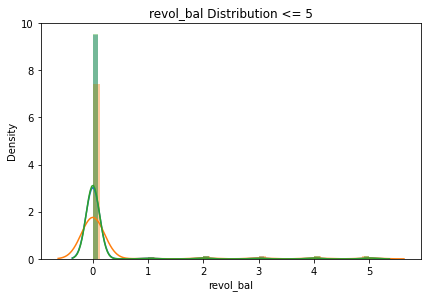

In [ ]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
ax = sns.distplot(fully_paid['revol_bal'][fully_paid['revol_bal'] <= 5])
plt.title('revol_bal Distribution <= 5')

plt.subplot(4, 2, 1)
ax = sns.distplot(charged_off['revol_bal'][charged_off['revol_bal'] <= 5])
plt.title('revol_bal Distribution <= 5')

plt.subplot(4, 2, 1)
ax = sns.distplot(current['revol_bal'][current['revol_bal'] <= 5])
plt.title('revol_bal Distribution <= 5')

In [ ]:
Data.revol_util.value_counts()

0%        15662
48%        3969
38%        3881
57%        3872
42%        3862
45%        3862
44%        3847
49%        3844
51%        3833
43%        3825
46%        3814
47%        3787
          ...  
119.5%        1
112.4%        1
126.9%        1
149.2%        1
125.6%        1
136.4%        1
120.1%        1
147.5%        1
122.3%        1
167.5%        1
117.7%        1
116.4%        1
Name: revol_util, Length: 1287, dtype: int64

Text(0.5, 1.0, 'Current revol_util')

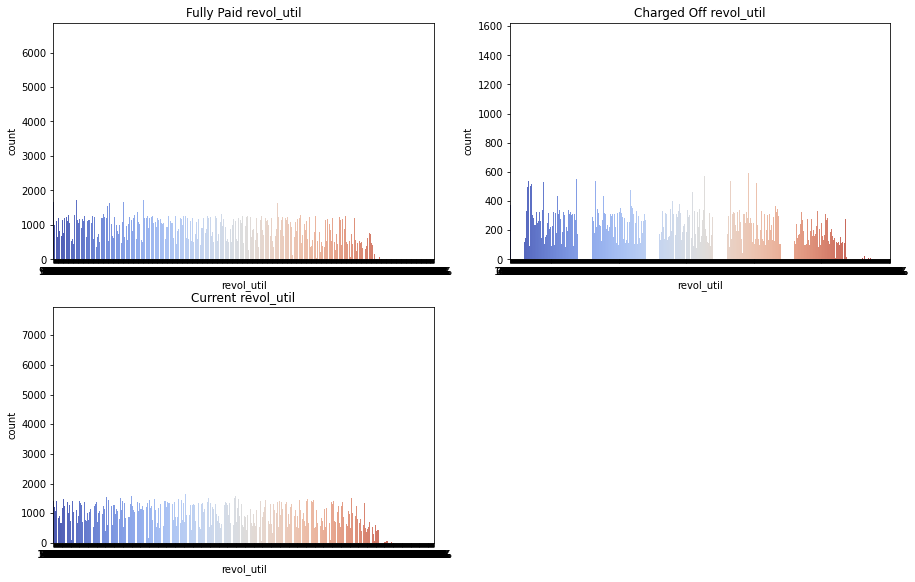

In [ ]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
ax = sns.countplot(x='revol_util', data=fully_paid, palette='coolwarm')
plt.title('Fully Paid revol_util')

plt.subplot(4, 2, 2)
ax = sns.countplot(x='revol_util', data=charged_off, palette='coolwarm')
plt.title('Charged Off revol_util')

plt.subplot(4, 2, 3)
ax = sns.countplot(x='revol_util', data=current, palette='coolwarm')
plt.title('Current revol_util')

***Last Fico***: FICO credit scores range from 300 to 850, and are classified into five categories that represent the likelihood that a consumer will repay his or her debts and the amount of risk he or she poses to lenders.

In [ ]:
Data.groupby(by='loan_status')['last_fico'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,242302.0,533.923822,117.209821,0.0,522.0,557.0,597.0,847.0
Current,1026252.0,710.680359,51.372737,0.0,682.0,712.0,742.0,847.0
Fully Paid,933437.0,705.643606,64.668385,0.0,677.0,712.0,747.0,847.0


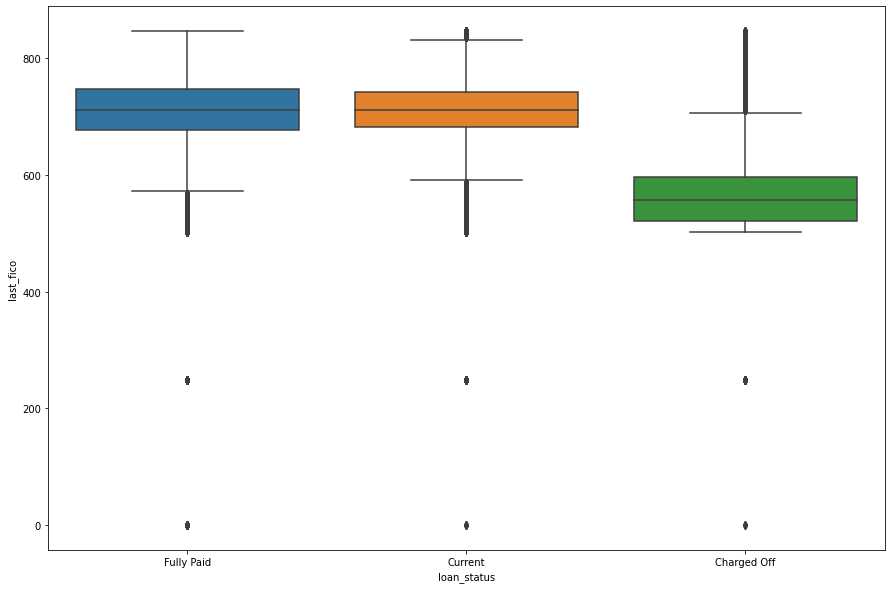

In [ ]:
plt.figure(figsize=(15, 10))

sns.boxplot(x="loan_status", y="last_fico", data=Data)

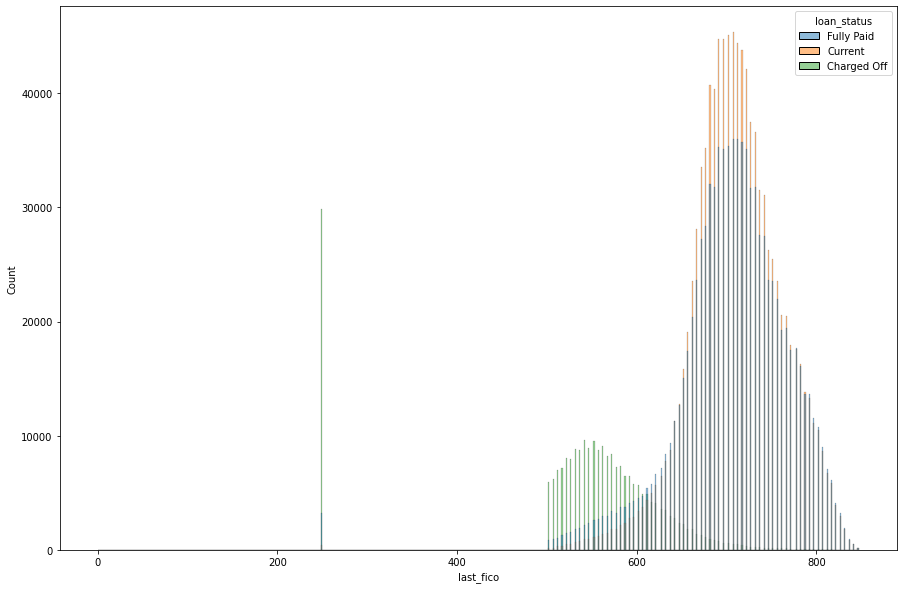

In [ ]:
plt.figure(figsize=(15, 10))

#create chart in each subplot
sns.histplot(data=Data, x='last_fico', hue='loan_status')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fico Distribution')

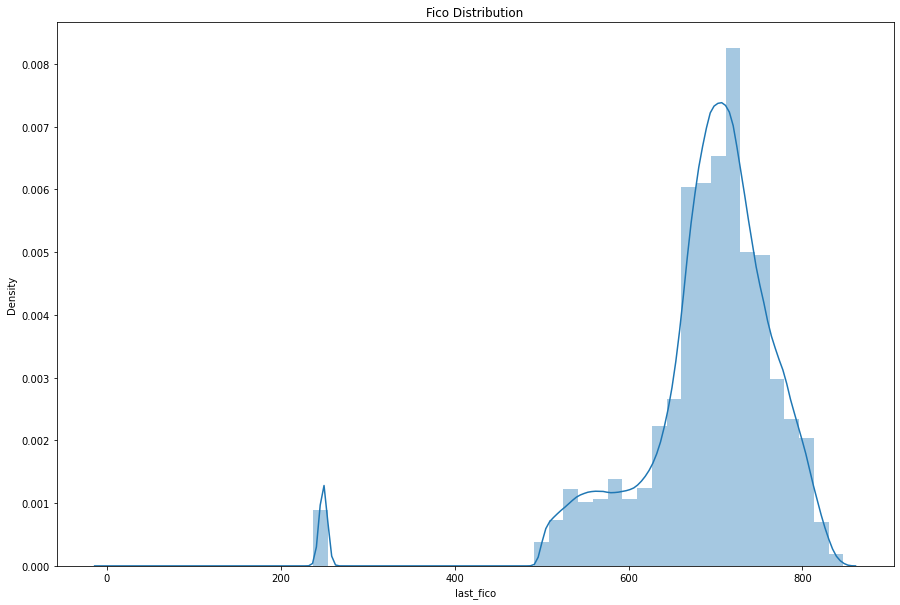

In [ ]:
plt.figure(figsize=(15, 10))

sns.distplot(Data['last_fico'])
plt.title('Fico Distribution')

In [ ]:
def ToRange(score):
  int(score)
  if score < 580:
    return 'Poor'
  elif score >= 580 and score <= 669:
    return 'Fair'
  elif score >= 670 and score <= 739:
    return 'Good'
  elif score >= 740 and score <= 799:
    return 'Very Good'
  else:
    return 'Exceptional'

In [ ]:
Data['Fico_Range'] = Data['last_fico'].apply(lambda x: ToRange(x))

In [ ]:
Data[['last_fico', 'Fico_Range']].head()

,last_fico,Fico_Range
0,692.0,Good
1,672.0,Good
2,767.0,Very Good
3,672.0,Good
5,777.0,Very Good


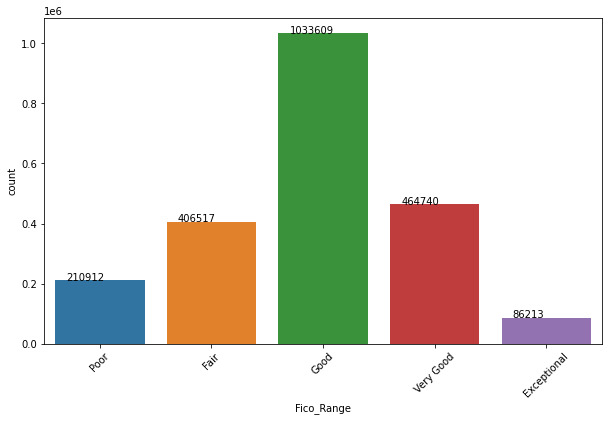

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x = 'Fico_Range', data = Data, order=["Poor", "Fair", "Good", "Very Good", "Exceptional"])

for p in ax.patches: ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

plt.xticks(rotation=45)
plt.show()